<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-4/blob/main/Homework_4_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 problem 2
#Ahmed Elshazly
#801420724

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

In [2]:
file_path = url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()
#housing.shape
#housing.isnull().sum()*100/housing.shape[0]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
furnishingstatus=housing.pop('furnishingstatus')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [4]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [5]:
stander=StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing[num_vars] = stander.fit_transform(housing[num_vars])

In [6]:
np.random.seed(0)
Y=housing.pop("price")
X=housing
x_train, x_test, y_train, y_test = train_test_split(X, Y , train_size = 0.8, test_size = 0.2, random_state = 100)
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,1.337297,0.047278,-0.570187,-0.929397,1,1,1,0,1,0.355976,0
41,0.557830,0.047278,1.421812,2.532024,1,0,0,0,1,-0.805741,1
91,0.737707,-1.308863,-0.570187,-0.929397,1,1,1,0,0,1.517692,1
118,0.585503,0.047278,-0.570187,-0.929397,1,0,1,0,1,-0.805741,1
472,-0.701308,1.403419,-0.570187,0.224410,1,0,0,0,0,2.679409,0


In [7]:
x_train = x_train.values
x_test= x_test.values
y_train=y_train.values
y_test=y_test.values

print(y_test[3])

4550000


In [8]:
svr_rbf = SVR(kernel='rbf', C=1e10, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e10)
svr_poly = SVR(kernel='poly', C=1e10, degree=2)
y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

mse_linear = mean_squared_error(y_test,y_lin)
mse_rbf = mean_squared_error(y_test,y_rbf)
mse_polynomial = mean_squared_error(y_test,y_poly)

rmse_linear = np.sqrt(mse_linear)
rmse_rbf = np.sqrt(mse_rbf)
rmse_polynomial = np.sqrt(mse_polynomial)

print(rmse_linear)
print(rmse_rbf)
print(rmse_polynomial)

1051700.3439341225
4016366.8089815117
1054192.5066844383


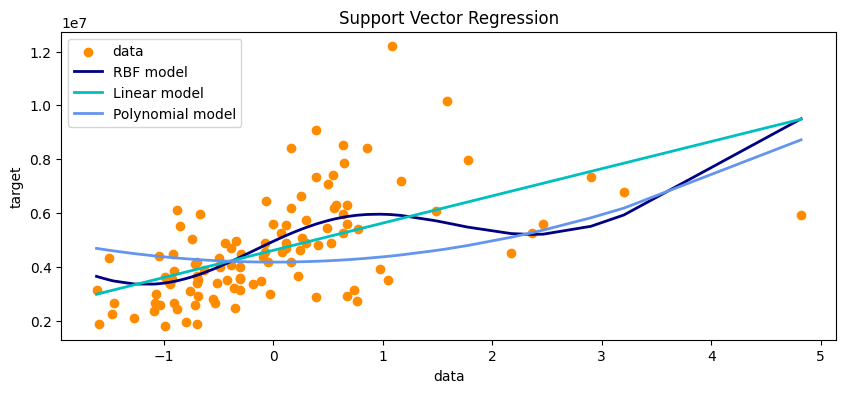

In [9]:
#select only the area feature

X1 = X.iloc[:, 0].values.reshape(-1, 1)  # Reshape to 2D
Y1=Y.values
x_train, x_test, y_train, y_test = train_test_split(X1, Y1 , train_size = 0.8, test_size = 0.2, random_state = 100)

svr_rbf = SVR(kernel='rbf', C=1e10,gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e10)
svr_poly = SVR(kernel='poly', C=1e10, degree=2)
y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

sorted_indices = x_test.flatten().argsort()
x_test_sorted = x_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_rbf_sorted = y_rbf[sorted_indices]
y_lin_sorted = y_lin[sorted_indices]
y_poly_sorted = y_poly[sorted_indices]

lw=2
plt.figure(figsize=(10, 4))
plt.scatter(x_test_sorted, y_test_sorted, color='darkorange', label='data')
plt.plot(x_test_sorted, y_rbf_sorted, color='navy', lw=lw, label='RBF model')
plt.plot(x_test_sorted, y_lin_sorted, color='c', lw=lw, label='Linear model')
plt.plot(x_test_sorted, y_poly_sorted, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()

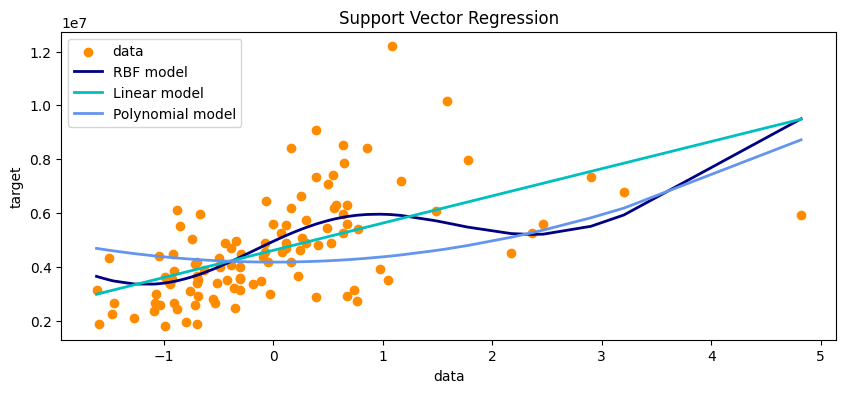

In [10]:
#apply PCA to convert all features into one feature

pca = PCA(n_components=1)
principalDf = pd.DataFrame(data = pca.fit_transform(X))
X_train, X_test, Y_train, Y_test = train_test_split(principalDf.values, Y, train_size = 0.8, test_size = 0.2, random_state = 0)
svr_rbf = SVR(kernel='rbf', C=1e10,gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e10)
svr_poly = SVR(kernel='poly', C=1e10, degree=2)
y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

sorted_indices = x_test.flatten().argsort()
x_test_sorted = x_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_rbf_sorted = y_rbf[sorted_indices]
y_lin_sorted = y_lin[sorted_indices]
y_poly_sorted = y_poly[sorted_indices]
lw=2
plt.figure(figsize=(10, 4))
plt.scatter(x_test_sorted, y_test_sorted, color='darkorange', label='data')
plt.plot(x_test_sorted, y_rbf_sorted, color='navy', lw=lw, label='RBF model')
plt.plot(x_test_sorted, y_lin_sorted, color='c', lw=lw, label='Linear model')
plt.plot(x_test_sorted, y_poly_sorted, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()

Optimal K for minimum RMSE with kernel linear: 8
RMSE at optimal K with kernel linear: 948800.4278776757


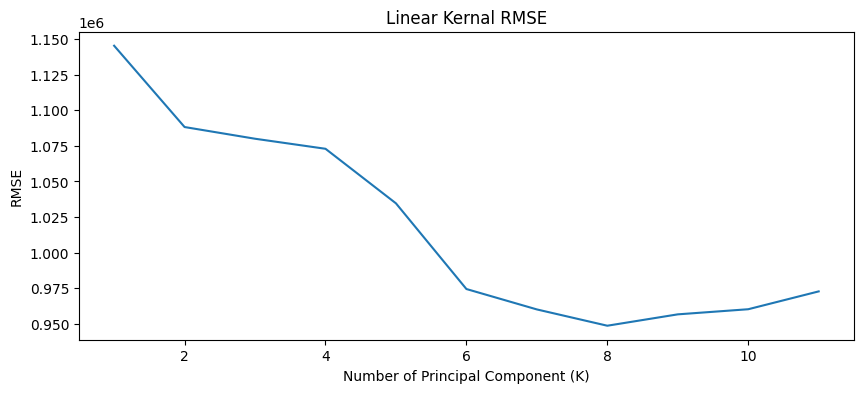

In [11]:
# Linear kernel
RMSEs_linear=[]
N = [i for i in range(1,12)]
for K in N:
  pca = PCA(n_components=K)
  principalDf = pd.DataFrame(data = pca.fit_transform(X))
  X_train, X_test, Y_train, Y_test = train_test_split(principalDf.values, Y, train_size = 0.8, test_size = 0.2, random_state = 0)
  classifier = SVR(kernel='linear', C=1e10)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  mse_linear = mean_squared_error(Y_test,Y_pred)
  rmse_linear = np.sqrt(mse_linear)
  RMSEs_linear.append(rmse_linear)

plt.figure(figsize=(10, 4))
plt.plot(N,RMSEs_linear)
plt.title('Linear Kernal RMSE')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('RMSE')

optimal_k_linear = N[RMSEs_linear.index(min(RMSEs_linear))]
optimal_RMSE_linear = min(RMSEs_linear)
print(f"Optimal K for minimum RMSE with kernel linear: {optimal_k_linear}")
print(f"RMSE at optimal K with kernel linear: {optimal_RMSE_linear}")

Optimal K for minimum RMSE with kernel RBF: 2
RMSE at optimal K with kernel RBF: 1602451.9854122347


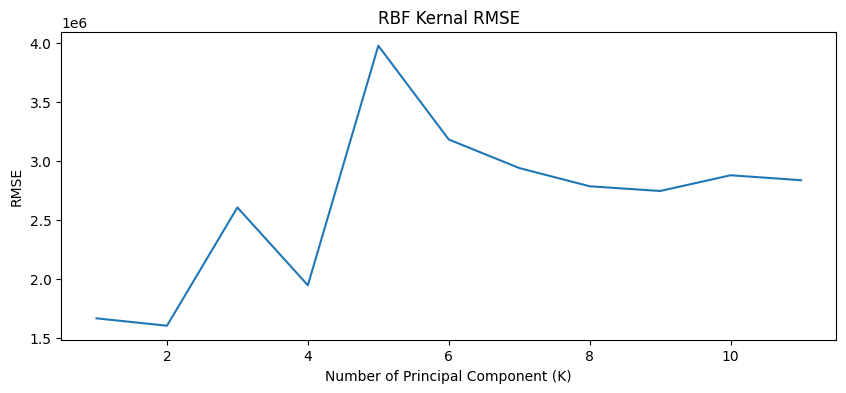

In [12]:
# RBF kernel
RMSEs_RBF=[]
N = [i for i in range(1,12)]
for K in N:
  pca = PCA(n_components=K)
  principalDf = pd.DataFrame(data = pca.fit_transform(X))
  X_train, X_test, Y_train, Y_test = train_test_split(principalDf.values, Y, train_size = 0.8, test_size = 0.2, random_state = 0)
  classifier = SVR(kernel='rbf', C=1e10,gamma=0.1)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  mse_RBF = mean_squared_error(Y_test,Y_pred)
  rmse_RBF = np.sqrt(mse_RBF)
  RMSEs_RBF.append(rmse_RBF)

plt.figure(figsize=(10, 4))
plt.plot(N,RMSEs_RBF)
plt.title('RBF Kernal RMSE')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('RMSE')

optimal_k_RBF = N[RMSEs_RBF.index(min(RMSEs_RBF))]
optimal_RMSE_RBF = min(RMSEs_RBF)
print(f"Optimal K for minimum RMSE with kernel RBF: {optimal_k_RBF}")
print(f"RMSE at optimal K with kernel RBF: {optimal_RMSE_RBF}")

Optimal K for minimum RMSE with kernel Polynomial: 10
RMSE at optimal K with kernel Polynomial: 1398018.3340888806


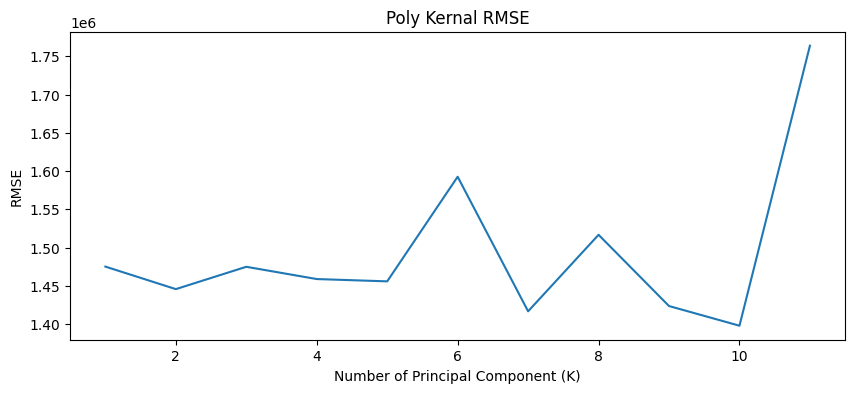

In [13]:
# Polynomial kernel
RMSEs_poly=[]
N = [i for i in range(1,12)]
for K in N:
  pca = PCA(n_components=K)
  principalDf = pd.DataFrame(data = pca.fit_transform(X))
  X_train, X_test, Y_train, Y_test = train_test_split(principalDf.values, Y, train_size = 0.8, test_size = 0.2, random_state = 0)
  classifier = SVR(kernel='poly', C=1e10,degree=2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  mse_poly = mean_squared_error(Y_test,Y_pred)
  rmse_poly = np.sqrt(mse_poly)
  RMSEs_poly.append(rmse_poly)

plt.figure(figsize=(10, 4))
plt.plot(N,RMSEs_poly)
plt.title('Poly Kernal RMSE')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('RMSE')

optimal_k_poly = N[RMSEs_poly.index(min(RMSEs_poly))]
optimal_RMSE_poly = min(RMSEs_poly)
print(f"Optimal K for minimum RMSE with kernel Polynomial: {optimal_k_poly}")
print(f"RMSE at optimal K with kernel Polynomial: {optimal_RMSE_poly}")